In [82]:
import pandas

read_counts_ikir_levels = pandas.read_csv("~/project2_KIR/counts_with_func_ikir_levels.csv", index_col=0)

In [69]:
read_counts_ikir_levels = read_counts_ikir_levels.drop(["Gender", "Age", "CD4", "HIV_VL"], axis=1)
read_counts_ikir_levels.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284585,ENSG00000284586,ENSG00000284587,ENSG00000284591,ENSG00000284592,ENSG00000284594,ENSG00000284595,ENSG00000284596,ENSG00000284600,level
StudyID,,,,,,,,,,,,,,,,,,,,,
RN001,1.126534,0.0,127.298394,337.960339,188.131255,3512.534452,92.375826,120.539187,1176.101978,739.006607,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,low
RN002,0.000000,0.0,103.687947,209.408990,123.002368,4094.657343,56.926716,204.326248,1805.390129,758.345178,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,low
RN003,3.084420,0.0,99.318310,362.727739,146.818371,3331.173116,6.168839,64.772811,413.312220,733.474969,...,0.0,0.0,0.0,0.0,0.0,0.616884,0.0,0.0,0.0,low
RN004,0.000000,0.0,79.024065,315.289892,182.239171,3398.034799,21.771936,99.183265,412.860422,823.301739,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,low
RN006,0.000000,0.0,138.950353,335.278215,163.836983,3788.989477,184.575842,85.720616,782.546267,775.633314,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,high


In [70]:
#read_counts_ikir_levels["Gender"] = read_counts_ikir_levels["Gender"].map({"M": 0,"F": 1})
read_counts_ikir_levels["level"] = read_counts_ikir_levels["level"].map({"low": 0,"high": 1})
#read_counts_ikir_levels.fillna(0, inplace=True)

read_counts_ikir_levels.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284585,ENSG00000284586,ENSG00000284587,ENSG00000284591,ENSG00000284592,ENSG00000284594,ENSG00000284595,ENSG00000284596,ENSG00000284600,level
StudyID,,,,,,,,,,,,,,,,,,,,,
RN001,1.126534,0.0,127.298394,337.960339,188.131255,3512.534452,92.375826,120.539187,1176.101978,739.006607,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
RN002,0.000000,0.0,103.687947,209.408990,123.002368,4094.657343,56.926716,204.326248,1805.390129,758.345178,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
RN003,3.084420,0.0,99.318310,362.727739,146.818371,3331.173116,6.168839,64.772811,413.312220,733.474969,...,0.0,0.0,0.0,0.0,0.0,0.616884,0.0,0.0,0.0,0
RN004,0.000000,0.0,79.024065,315.289892,182.239171,3398.034799,21.771936,99.183265,412.860422,823.301739,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
RN006,0.000000,0.0,138.950353,335.278215,163.836983,3788.989477,184.575842,85.720616,782.546267,775.633314,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [71]:
from sklearn.model_selection import train_test_split

y = read_counts_ikir_levels["level"].values
X = read_counts_ikir_levels.drop(["level"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286})
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9933333333333333
0.6266666666666667


In [8]:
from sklearn import metrics

R2 = model.score(X_test, y_test)

y_predicted_default = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_predicted_default)

print(f"Model score: {R2}")
print(f"Mean Squared Error: {mse}")

Model score: 0.6133333333333333
Mean Squared Error: 0.38666666666666666


0.0625
0.17142857142857143
0.18181818181818182


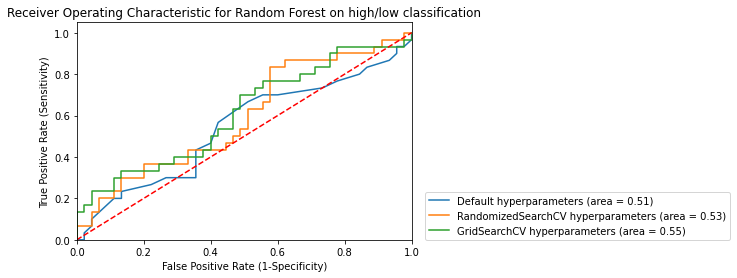

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Default hyperparameters',
    'model': RandomForestClassifier(class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
},
{
    'label': 'RandomizedSearchCV hyperparameters',
    'model': RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=60, bootstrap=True, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
},
{
    'label': 'GridSearchCV hyperparameters',
    'model': RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    #calc F1 values
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f1_score)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13)
plt.title('Receiver Operating Characteristic for Random Forest on high/low classification', fontsize=16)
plt.legend(loc=(1.04, 0))
plt.show()   # Display

In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100)

model.fit(X_train, y_train)

importances = list(model.feature_importances_)

feature_list = list(X.columns)

feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)

key_features = []

for feature, importance in feature_importances:
    if importance > 0.0:
        key_features.append(feature)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print(len(key_features))

Variable: ENSG00000240403      Importance: 0.007216
Variable: ENSG00000261532      Importance: 0.005812
Variable: ENSG00000138326      Importance: 0.004478
Variable: ENSG00000271911      Importance: 0.003999
Variable: ENSG00000260357      Importance: 0.003696
Variable: ENSG00000228668      Importance: 0.003604
Variable: ENSG00000256030      Importance: 0.00357
Variable: ENSG00000175701      Importance: 0.003377
Variable: ENSG00000270977      Importance: 0.003352
Variable: ENSG00000135925      Importance: 0.003286
Variable: ENSG00000120949      Importance: 0.003203
Variable: ENSG00000168970      Importance: 0.00317
Variable: ENSG00000129226      Importance: 0.003086
Variable: ENSG00000264112      Importance: 0.003069
Variable: ENSG00000205978      Importance: 0.003019
Variable: ENSG00000168502      Importance: 0.002904
Variable: ENSG00000201861      Importance: 0.002893
Variable: ENSG00000169962      Importance: 0.002851
Variable: ENSG00000140948      Importance: 0.002832
Variable: ENSG

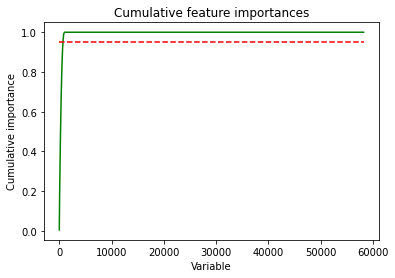

In [73]:
import numpy as np
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
#plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative importance'); plt.title('Cumulative feature importances');

In [78]:
print('Number of features for 80% importance:', np.where(cumulative_importances > 0.035)[0][0] + 1)
print(len(sorted_importances))

Number of features for 80% importance: 10
58233


In [59]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:453]]
print(important_feature_names)

# Create training and testing sets with only the important features
important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

['ENSG00000114124', 'ENSG00000236496', 'ENSG00000223343', 'ENSG00000228668', 'ENSG00000113593', 'ENSG00000259357', 'ENSG00000183199', 'ENSG00000132950', 'ENSG00000277136', 'ENSG00000083750', 'ENSG00000187144', 'ENSG00000200320', 'ENSG00000199785', 'ENSG00000224802', 'ENSG00000157423', 'ENSG00000264435', 'ENSG00000180730', 'ENSG00000260671', 'ENSG00000100644', 'ENSG00000276588', 'ENSG00000128602', 'ENSG00000101210', 'ENSG00000112667', 'ENSG00000182912', 'ENSG00000261594', 'ENSG00000166794', 'ENSG00000118454', 'ENSG00000057252', 'ENSG00000213433', 'ENSG00000257307', 'ENSG00000260105', 'ENSG00000267303', 'ENSG00000258794', 'ENSG00000256826', 'ENSG00000272103', 'ENSG00000260357', 'ENSG00000122042', 'ENSG00000225313', 'ENSG00000228886', 'ENSG00000237531', 'ENSG00000175414', 'ENSG00000259010', 'ENSG00000257622', 'ENSG00000229152', 'ENSG00000111605', 'ENSG00000106089', 'ENSG00000264343', 'ENSG00000166444', 'ENSG00000086827', 'ENSG00000261812', 'ENSG00000231889', 'ENSG00000236358', 'ENSG000002

In [61]:
#model = RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100)
model =RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

0.2439024390243902


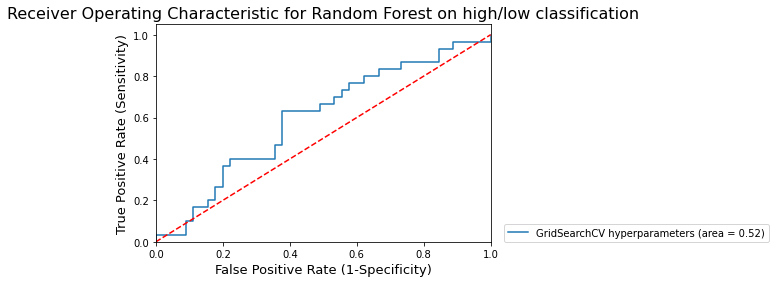

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'GridSearchCV hyperparameters',
    'model': RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(important_train_features, y_train) # train the model
    y_pred=model.predict(important_test_features) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(important_test_features)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(important_test_features))
    #calc F1 values
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f1_score)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13)
plt.title('Receiver Operating Characteristic for Random Forest on high/low classification', fontsize=16)
plt.legend(loc=(1.04, 0))
plt.show()   # Display

0.2222222222222222
0.3913043478260869
0.2
0.28571428571428575


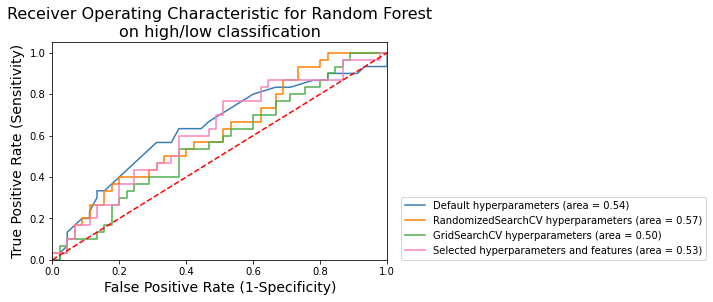

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models_full_data = [
{
    'label': 'Default hyperparameters',
    'model': RandomForestClassifier(class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
    'color': '#377eb8'
},
{
    'label': 'RandomizedSearchCV hyperparameters',
    'model': RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=60, bootstrap=True, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
    'color': '#ff7f00'
},
{
    'label': 'GridSearchCV hyperparameters',
    'model': RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
    'color': '#4daf4a'
}
]

models_selfeat = [
{
    'label': 'Selected hyperparameters and features',
    'model': RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100, class_weight={0: 0.7692307692307693, 1: 1.4285714285714286}),
    'color': '#f781bf'
}
]
# Below for loop iterates through your models list
for m in models_full_data:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    #calc F1 values
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f1_score)
    # Now, plot the computed values
    plt.plot(fpr, tpr, color=m['color'], label='%s (area = %0.2f)' % (m['label'], auc))

for m in models_selfeat:
    model = m['model'] # select the model
    model.fit(important_train_features, y_train) # train the model
    y_pred=model.predict(important_test_features) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(important_test_features)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(important_test_features))
    #calc F1 values
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f1_score)
    # Now, plot the computed values
    plt.plot(fpr, tpr, color=m['color'], label='%s (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic for Random Forest\non high/low classification', fontsize=16)
plt.legend(loc=(1.04, 0))
plt.show()   # Display

In [67]:
from sklearn import metrics

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

f1_score_train = metrics.f1_score(y_train, y_predicted_train)
f1_score_test = metrics.f1_score(y_test, y_predicted)

print(f1_score_train)
print(f1_score_test)

1.0
0.21621621621621623


In [130]:
model = RandomForestClassifier(bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=7, n_estimators=100)

model.fit(important_train_features, y_train)

importances = list(model.feature_importances_)

feature_list = list(X.columns)

feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)

key_features = []

for feature, importance in feature_importances:
    if importance > 0.0:
        key_features.append(feature)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print(len(key_features))

Variable: ENSG00000007516      Importance: 0.016023
Variable: ENSG00000005100      Importance: 0.014492
Variable: ENSG00000007341      Importance: 0.014148
Variable: ENSG00000010282      Importance: 0.013851
Variable: ENSG00000001036      Importance: 0.013218
Variable: ENSG00000013619      Importance: 0.012627
Variable: ENSG00000001497      Importance: 0.012156
Variable: ENSG00000000971      Importance: 0.011084
Variable: ENSG00000010244      Importance: 0.010615
Variable: ENSG00000001460      Importance: 0.010512
Variable: ENSG00000006059      Importance: 0.010436
Variable: ENSG00000007392      Importance: 0.010388
Variable: ENSG00000001631      Importance: 0.010191
Variable: ENSG00000001626      Importance: 0.009762
Variable: ENSG00000000457      Importance: 0.00969
Variable: ENSG00000004660      Importance: 0.009398
Variable: ENSG00000009724      Importance: 0.009352
Variable: ENSG00000001630      Importance: 0.009062
Variable: ENSG00000004059      Importance: 0.008884
Variable: ENS

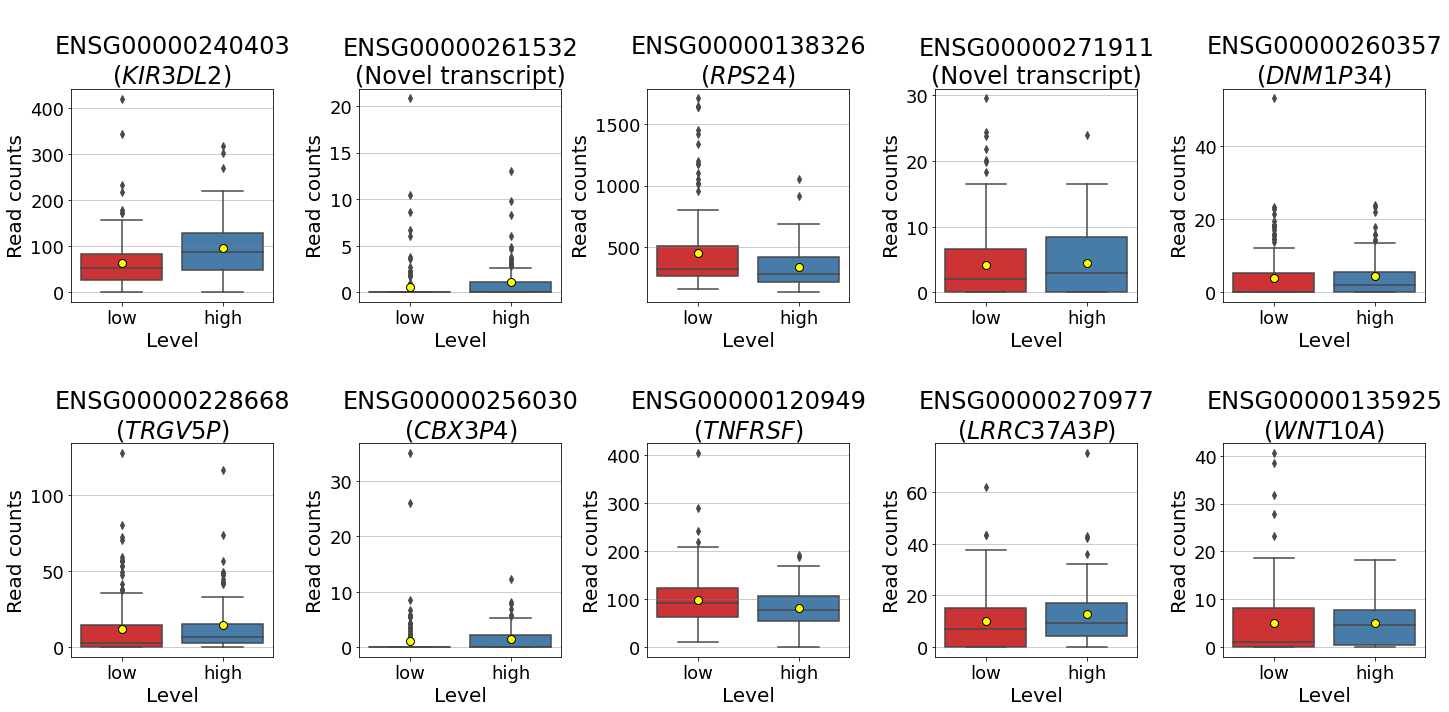

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

genes_of_interest = ['ENSG00000240403',
'ENSG00000261532',
'ENSG00000138326',
'ENSG00000271911',
'ENSG00000260357',
'ENSG00000228668',
'ENSG00000256030',
'ENSG00000120949',
'ENSG00000270977',
'ENSG00000135925'
]

gene_name = ['KIR3DL2',
'Novel transcript',
'RPS24',
'Novel transcript',
'DNM1P34',
'TRGV5P',
'CBX3P4',
'TNFRSF',
'LRRC37A3P',
'WNT10A'
]

ids_and_names = zip(genes_of_interest, gene_name)

read_counts_ikir_levels['level'] = pd.Categorical(read_counts_ikir_levels['level'], categories=['low', 'high'], ordered=True)

meanprops = {"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black", "markersize":"8"}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes_flat = axes.flatten()

for ax, gene in zip(axes_flat, ids_and_names):
    sns.boxplot(data=read_counts_ikir_levels, x="level", y=gene[0], ax=ax, fliersize=5, palette="Set1", showmeans=True, meanprops=meanprops)
    ax.yaxis.grid(True, linestyle='-', which='major', color='gray', alpha=0.5)
    if gene[1].startswith('Novel'):
        ax.set_title(f'\n{gene[0]}\n({gene[1]})', fontsize=24)
    else:
        ax.set_title(f'\n{gene[0]}\n(${gene[1]}$)', fontsize=24)
    ax.set_ylabel('Read counts', fontsize=20)
    ax.set_xlabel('Level', fontsize=20)
    ax.tick_params(labelsize=18)
    
plt.tight_layout()
plt.show()

In [87]:
from scipy.stats import ttest_ind

results = {}  # to store t-values, p-values, and degrees of freedom for each gene

genes_of_interest = ['ENSG00000252212',
'ENSG00000217702',
'ENSG00000243772',
'ENSG00000267421',
'ENSG00000074966',
'ENSG00000163817',
'ENSG00000232093',
'ENSG00000052344',
'ENSG00000234558',
'ENSG00000125498'
]

for gene in genes_of_interest:
    # Extract data for each level
    data_level_high = read_counts_ikir_levels[read_counts_ikir_levels['level'] == 'high'][gene]
    data_level_low = read_counts_ikir_levels[read_counts_ikir_levels['level'] == 'low'][gene]

    # Perform t-test with equal variance assumption
    t_stat, p_value = ttest_ind(data_level_high, data_level_low, equal_var=True)

    # Degrees of freedom for t-test assuming equal variances
    df = len(data_level_high) + len(data_level_low) - 2

    # Store the results
    results[gene] = {"t_stat": t_stat, "p_value": p_value, "df": df}

# Print the results
for gene, stats in results.items():
    print(f"{gene}: t-statistic = {stats['t_stat']:.3f}, p-value = {stats['p_value']:.5f}, degrees of freedom = {stats['df']}")

ENSG00000252212: t-statistic = 2.556, p-value = 0.01125, degrees of freedom = 223
ENSG00000217702: t-statistic = 2.787, p-value = 0.00578, degrees of freedom = 223
ENSG00000243772: t-statistic = 4.679, p-value = 0.00001, degrees of freedom = 223
ENSG00000267421: t-statistic = 3.214, p-value = 0.00150, degrees of freedom = 223
ENSG00000074966: t-statistic = 4.020, p-value = 0.00008, degrees of freedom = 223
ENSG00000163817: t-statistic = 1.437, p-value = 0.15214, degrees of freedom = 223
ENSG00000232093: t-statistic = 3.190, p-value = 0.00163, degrees of freedom = 223
ENSG00000052344: t-statistic = 1.990, p-value = 0.04779, degrees of freedom = 223
ENSG00000234558: t-statistic = 2.521, p-value = 0.01240, degrees of freedom = 223
ENSG00000125498: t-statistic = 4.758, p-value = 0.00000, degrees of freedom = 223


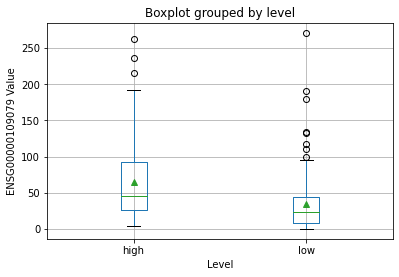

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

cfh_counts = read_counts_ikir_levels['ENSG00000125498']
ikir_levels = read_counts_ikir_levels['level']

read_counts_ikir_levels.boxplot(column='ENSG00000125498', by='level', showmeans=True)
plt.title("Boxplot grouped by level")
plt.suptitle('')  # This line removes the default title
plt.xlabel('Level')
plt.ylabel('ENSG00000125498 Value')
plt.show()


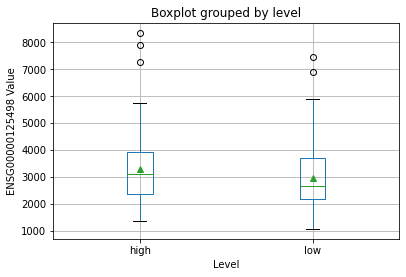

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

cfh_counts = read_counts_ikir_levels['ENSG00000131042']
ikir_levels = read_counts_ikir_levels['level']


# Boxplot
read_counts_ikir_levels.boxplot(column='ENSG00000131042', by='level', showmeans=True)
plt.title("Boxplot grouped by level")
plt.suptitle('')  # This line removes the default title
plt.xlabel('Level')
plt.ylabel('ENSG00000125498 Value')
plt.show()


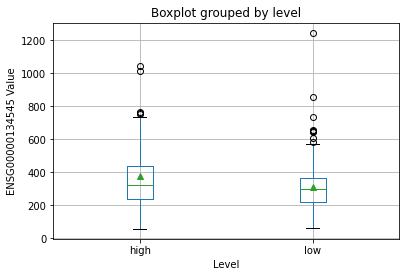

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

cfh_counts = read_counts_ikir_levels['ENSG00000135077']
ikir_levels = read_counts_ikir_levels['level']


# Boxplot
read_counts_ikir_levels.boxplot(column='ENSG00000135077', by='level', showmeans=True)
plt.title("Boxplot grouped by level")
plt.suptitle('')  # This line removes the default title
plt.xlabel('Level')
plt.ylabel('ENSG00000134545 Value')
plt.show()


In [51]:
read_counts_ikir_levels.iloc[:, [9546, 9723, 9778, 10377]]

,ENSG00000152475,ENSG00000154118,ENSG00000154537,ENSG00000159674
StudyID,,,,
RN001,0.000000,0.0,5.632672,337.960339
RN002,0.000000,0.0,0.000000,434.066208
RN003,16.038982,0.0,5.551955,425.033014
RN004,0.000000,0.0,10.482784,542.685671
RN006,7.604248,0.0,5.530362,296.565679
...,...,...,...,...
RN237,5.098600,0.0,3.059160,368.118904
RN239,13.096273,0.0,6.548136,436.854237
RN238,17.199025,0.0,0.000000,445.263656
